In [523]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy
from sympy import isprime, primerange
from tqdm import tqdm
from copy import copy
from matplotlib import collections  as mc
import uuid
from subprocess import call



%matplotlib inline

## Utils

In [ ]:
def crossover(a,b):
    write_to_file(a, "/tmp/aa.tsp")
    write_to_file(b, "/tmp/bb.tsp")
    
    call(["../cpp/gsx2", "/tmp/aa.tsp", "/tmp/bb.tsp", "/tmp/out.tsp"])
    
    out_seq = read_from_file("/tmp/out.tsp")
    
    assert(len(out_seq)==len(a))
    assert(out_seq[0] == out_seq[-1] == 0)
    
    return out_seq

## Prepare input

In [2]:
cities = pd.read_csv('../input/cities.csv', index_col=['CityId'])

In [3]:
class Tour(list):  # list with trailing 0
    penalized = ~cities.index.isin(sympy.primerange(0, len(cities)))

    @staticmethod
    def from_file(filename):  # from linkern's output or csv
        seq = [int(x) for x in open(filename).read().split()[1:]]
        return Tour(seq if seq[-1] == 0 else (seq + [0]))

    def score(self):
        df = cities.reindex(self)
        dist = np.hypot(df.X.diff(-1), df.Y.diff(-1))
        penalty = 0.1 * dist[9::10] * self.penalized[self[9::10]]
        _score = dist.sum() + penalty.sum()
        _score = np.round(_score,2)

        return _score

    def to_csv(self, filename):
        pd.DataFrame({'Path': self}).to_csv(filename, index=False)

In [226]:
tour = Tour.from_file('../../../Downloads/LKH-2.0.9/data/linkern.tour')
#tour.to_csv('pool/{}.csv'.format(tour.score()))
print(tour.score())

1517113.59


In [385]:
def crossover(a,b):
    write_to_file(a, "/tmp/aa.tsp")
    write_to_file(b, "/tmp/bb.tsp")
    
    call(["../cpp/gsx2", "/tmp/aa.tsp", "/tmp/bb.tsp", "/tmp/out.tsp"])
    
    out_seq = read_from_file("/tmp/out.tsp")
    
    assert(len(out_seq)==len(a))
    assert(out_seq[0] == out_seq[-1] == 0)
    
    return out_seq

In [241]:
def write_to_file(seq, out):
    with open(out, "w") as f:
        f.write(" ".join([str(x) for x in seq]))

In [268]:
def read_from_file(inp):
    with open(inp, "r") as f:
        data = f.readlines()[0].strip().split(" ")
        return [int(x) for x in data]

In [278]:
write_to_file(aa, "/tmp/aa.tsp")
write_to_file(bb, "/tmp/bb.tsp")


In [270]:
yy = read_from_file("/tmp/aa.tsp")

In [277]:
len(yy)

197770

In [307]:
write_to_file(aa, "/tmp/aa.tsp")
write_to_file(bb, "/tmp/bb.tsp")
offspring = crossover("/tmp/aa.tsp", "/tmp/bb.tsp")

In [370]:
print(len(population[1].path))
print(len(population[0].path))
len(crossover(population[1].path,population[0].path))

43
43


43

In [5]:
from math import hypot
class Node:
    """
    represents a node in a TSP tour
    """
    def __init__(self, num, coords):
        self.num = num # start position in a route's order
        self.x = coords[0]   # x coordinate
        self.y = coords[1]   # y coordinate

    def __str__(self):
        """
        returns the string representation of a Node
        """
        return self.num

    def __eq__(self, other):
        return self.__dict__ == other.__dict__

    def euclidean_dist(self, other):
        """
        returns the Euclidean distance between this Node and other Node
        other - other node
        """
        dx = self.x - other.x
        dy = self.y - other.y
        return hypot(dx, dy)

In [6]:
PATH = []
for i in range(len(tour)):
    PATH.append(Node(tour[i], cities.values[tour[i]]))

In [7]:
def sscore(p):
    distance = 0.0
    for i in range(len(p)-1):
        d = p[i].euclidean_dist(p[i+1])
        if i%10 == 0 and not isprime(p[i-1].num): d *= 1.1 
        distance += d
    return distance

In [8]:
sscore(PATH)

1517126.8455356655

197769

# Newly improved GSX (GSX-2).

In [9]:
parent1 = list(range(1,42))
parent1 = np.random.permutation(parent1)
parent1 = np.insert(parent1, 0, 0)
parent1 = np.insert(parent1, len(parent1), 0)
parent1

array([ 0, 33, 20, 39, 15,  7, 21, 12, 31, 32, 17, 34, 36, 13, 14, 35, 30,
       40, 27, 29, 22,  9, 26,  8,  2,  4, 18, 41,  5, 37, 25, 10, 28,  1,
        6,  3, 16, 24, 23, 38, 19, 11,  0])

In [10]:
parent2 = list(range(1,42))
parent2 = np.random.permutation(parent2)
parent2 = np.insert(parent2, 0, 0)
parent2 = np.insert(parent2, len(parent2), 0)
parent2

array([ 0, 11, 36,  3, 15, 18,  8, 29, 26, 16, 39, 19, 24, 25,  5, 10,  1,
       41, 21, 35, 12, 33, 30, 13,  4, 27,  2,  9,  7, 40, 14, 38,  6, 17,
       31, 34, 37, 32, 22, 28, 20, 23,  0])

### Step 1 : select random city 

In [11]:
rnd_city = np.random.randint(low=1, high=43)
rnd_city

5

### Step 2: alternately add cities from parents, each for one direction, until either a city that has already been included in the offspring is met or exchangeable subtours are found

In [12]:


offspring = [rnd_city]
rnd_city_in_parent1 = np.argwhere(parent1 == rnd_city)[0][0]
rnd_city_in_parent2 = np.argwhere(parent2 == rnd_city)[0][0]
city_included = [rnd_city]
STOP = False
idx1 = rnd_city_in_parent1 + 1
idx2 = rnd_city_in_parent2 - 1
while not STOP:
    if idx1 < len(parent1)-1: ## -1 for the 0 
        if parent1[idx1] in city_included:
            STOP = True
            break
        offspring.append(parent1[idx1])
        city_included.append(parent1[idx1])
        idx1+=1
    else:
        break
 
    if idx2 > 0: ## > strict for the 0
        if parent2[idx2] in city_included:
            STOP = True
            break
        offspring.insert( 0,parent2[idx2])
        city_included.append(parent2[idx2])
        idx2-=1

In [13]:
offspring

[25, 5, 37]

### Step 3: fill in the remaining cities at the order of parent 2

In [14]:
for i in range(1, len(parent2)-1): ##-1 for the zero
    if parent2[i] not in city_included:
        offspring.append(parent2[i])

In [15]:
offspring.append(0)
offspring.insert(0, 0)

In [16]:
print(offspring)

[0, 25, 5, 37, 11, 36, 3, 15, 18, 8, 29, 26, 16, 39, 19, 24, 10, 1, 41, 21, 35, 12, 33, 30, 13, 4, 27, 2, 9, 7, 40, 14, 38, 6, 17, 31, 34, 32, 22, 28, 20, 23, 0]


In [17]:
print( Tour(parent1).score(), Tour(parent2).score(), Tour(offspring).score())

89396.61 94625.9 94974.03


In [18]:
assert len(offspring)==len(parent1)==len(parent2)
assert offspring[0]==offspring[-1]==0
assert len(set(offspring))==len(offspring)-1

 ## Double-bridge move mutation operator

In [19]:
i, ii, j, jj, k, kk, l, ll = 3, 4, 9, 10, 28, 29, 35, 36

In [20]:
new_route = offspring[0:i+1]

new_route.append(offspring[kk])
new_route.extend(offspring[kk+1:l+1])
new_route.append(offspring[jj])
new_route.extend(offspring[jj+1:k+1])
new_route.append(offspring[ii])
new_route.extend(offspring[ii+1:j+1])
new_route.append(offspring[ll])
new_route.extend(offspring[ll+1:])

print(new_route)
print("+++++++++++++")
print(offspring)


assert len(new_route)==len(offspring)
assert new_route[0]==new_route[-1]==0
assert len(set(new_route))==len(new_route)-1
print( Tour(offspring).score(), Tour(new_route).score())




[0, 25, 5, 37, 7, 40, 14, 38, 6, 17, 31, 29, 26, 16, 39, 19, 24, 10, 1, 41, 21, 35, 12, 33, 30, 13, 4, 27, 2, 9, 11, 36, 3, 15, 18, 8, 34, 32, 22, 28, 20, 23, 0]
+++++++++++++
[0, 25, 5, 37, 11, 36, 3, 15, 18, 8, 29, 26, 16, 39, 19, 24, 10, 1, 41, 21, 35, 12, 33, 30, 13, 4, 27, 2, 9, 7, 40, 14, 38, 6, 17, 31, 34, 32, 22, 28, 20, 23, 0]
94974.03 94860.73


In [21]:
for  i in offspring:
    if i not in new_route:
        print (i)

In [22]:
def swap_2opt(route, i, k):
    """
    swaps the endpoints of two edges by reversing a section of nodes, 
    ideally to eliminate crossovers
    returns the new route created with a the 2-opt swap
    route - route to apply 2-opt
    i - start index of the portion of the route to be reversed
    k - index of last node in portion of route to be reversed
    pre: 0 <= i < (len(route) - 1) and i < k < len(route)
    post: length of the new route must match length of the given route 
    """
    assert i >= 0 and i < (len(route) - 1)
    assert k > i and k < len(route)
    new_route = route[0:i]
    new_route.extend(reversed(route[i:k + 1]))
#    reversed(route[i:k + 1])
    new_route.extend(route[k+1:])
    assert len(new_route)==len(route)
    assert new_route[0]==new_route[-1]==0
    assert len(set(new_route))==len(new_route)-1
    return Tour(new_route)

In [43]:
from multiprocessing import Process, Pool
import os
import time

def info(title):
    print(title)
    print('module name:', __name__)
    print('parent process:', os.getppid())
    print('process id:', os.getpid())
    time.sleep(3)

def f(name):
    info('function f')
    print('hello', name)

if __name__ == '__main__':
     with Pool(8) as p:
        print(p.map(info, ))
        
        
        
        
        

NameError: name 'cities_per_thread' is not defined

In [437]:
def read_from_julia(input_file):
    opts = []
    with open(input_file, "r") as f:
        size = int(f.readline())
        for i in range(size):
            distance,i,j = (x for x in f.readline().strip().split(" "))
            distance = float(distance)
            i = int(i)
            j = int(j)
            opts.append((distance,i,j))
    return opts
    

In [438]:
read_from_julia("/tmp/test.txt")

[(80710.07, 1, 4),
 (79143.38, 1, 5),
 (80285.34, 1, 7),
 (80389.53, 1, 9),
 (80440.04, 1, 11),
 (80456.5, 2, 4),
 (78687.79, 5, 6),
 (79882.32, 5, 8),
 (79518.46, 5, 10),
 (80593.61, 5, 12),
 (79972.81, 5, 14),
 (79450.09, 5, 41),
 (79462.48, 6, 7),
 (79527.75, 6, 9),
 (79743.98, 6, 11),
 (80705.1, 6, 13),
 (78902.3, 7, 8),
 (78812.15, 7, 10),
 (80091.46, 7, 12),
 (79572.74, 7, 14),
 (79453.88, 7, 41),
 (78330.49, 8, 9),
 (78656.65, 8, 11),
 (79922.44, 8, 13),
 (80236.62, 8, 15),
 (78667.44, 9, 10),
 (80016.65, 9, 12),
 (79806.63, 9, 14),
 (79463.84, 9, 41),
 (76996.76, 10, 11),
 (78253.95, 10, 13),
 (80712.76, 10, 14),
 (78561.81, 10, 15),
 (79777.23, 10, 17),
 (80143.5, 10, 19),
 (80661.09, 10, 35),
 (80268.04, 10, 41),
 (78076.59, 11, 12),
 (77843.5, 11, 14),
 (79528.94, 11, 16),
 (79769.19, 11, 18),
 (80605.18, 11, 20),
 (78766.29, 11, 41)]

In [453]:
def task_julia(start, end, path_to_input, path_to_output, k=20):
    ## Step1: load route 
    route = read_from_file(path_to_input)
    
    ## Evaluate current distance
    distance = Tour(route).score()
    best_distance = distance
    
    ## Perform k-opt between start and end for the k neighbors
    opts = []
    for i in range(start, end):
        for j in range(i+1, len(route)-1):
            new_route = swap_2opt(route, i, j) ## replace by call to Julia
            new_distance = new_route.score()
            if new_distance < best_distance:
                opts.append((new_distance, i, j))

    ## Write solutions to file
    with open(path_to_output, "w") as f:
        f.write(str(len(opts)))
        f.write("\n")
        for opt in opts:
            f.write(str(opt[0]) + " " + str(opt[1]) + " " + str(opt[2]))
            f.write("\n")
        

In [423]:
task_julia(1, 12, "/tmp/out.tsp", "/tmp/test.txt")

In [424]:
!cat /tmp/test.txt

43
80710.07 1 4
79143.38 1 5
80285.34 1 7
80389.53 1 9
80440.04 1 11
80456.5 2 4
78687.79 5 6
79882.32 5 8
79518.46 5 10
80593.61 5 12
79972.81 5 14
79450.09 5 41
79462.48 6 7
79527.75 6 9
79743.98 6 11
80705.1 6 13
78902.3 7 8
78812.15 7 10
80091.46 7 12
79572.74 7 14
79453.88 7 41
78330.49 8 9
78656.65 8 11
79922.44 8 13
80236.62 8 15
78667.44 9 10
80016.65 9 12
79806.63 9 14
79463.84 9 41
76996.76 10 11
78253.95 10 13
80712.76 10 14
78561.81 10 15
79777.23 10 17
80143.5 10 19
80661.09 10 35
80268.04 10 41
78076.59 11 12
77843.5 11 14
79528.94 11 16
79769.19 11 18
80605.18 11 20
78766.29 11 41


In [338]:
from multiprocessing import Queue

def task(bucket, route, best_distance, result):
    (start, end) = bucket

    
    
    for i in range(start, end):
        for k in range(i+1, len(route)-1):
            new_route = swap_2opt(route, i, k) ## replace by call to Julia
            new_distance = new_route.score()
            if new_distance < best_distance:
                result.put((new_distance, i, k))

In [496]:
cities_per_thread = []
if (len(route)-2)%n_threads:
    cities_per_thread.append((len(route)-2)%n_threads) 
else:
    cities_per_thread.append(len(route)//n_threads)
for i in range(n_threads-1):
    cities_per_thread.append(len(route)//n_threads)

buckets = [] 
OPTS = []

for i, bucket in enumerate(np.cumsum(cities_per_thread)):
    #print(i, bucket)
    if i == 0:
        buckets.append((1, bucket))#    population[0].path[1:-1][:bucket]     )

    else:
        buckets.append((buckets[-1][1], bucket)) #population[0].path[1:-1][np.cumsum(cities_per_thread)[i-1]:bucket]  )

print(buckets)    

[(1, 1), (1, 5), (5, 9), (9, 13), (13, 17), (17, 21), (21, 25), (25, 29), (29, 33), (33, 37)]


In [486]:
cities_per_thread

[1, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [511]:
def run_2opt(route):
    """
    improves an existing route using the 2-opt swap until no improved route is found
    best path found will differ depending of the start node of the list of nodes
        representing the input tour
    returns the best path found
    route - route to improve
    """
    improvement = True
    best_route = route
    best_distance = route.score()
    
    n_threads = 4
    
    cities_per_thread = []
    if (len(route)-2)%n_threads:
        cities_per_thread.append((len(route)-2)%n_threads) 
    else:
        cities_per_thread.append(len(route)//n_threads)
    for i in range(n_threads-1):
        cities_per_thread.append(len(route)//n_threads)

    
    buckets = [] 
    OPTS = []

    for i, bucket in enumerate(np.cumsum(cities_per_thread)):
        #print(i, bucket)
        if i == 0:
            buckets.append((1, bucket))#    population[0].path[1:-1][:bucket]     )

        else:
            buckets.append((buckets[-1][1], bucket)) #population[0].path[1:-1][np.cumsum(cities_per_thread)[i-1]:bucket]  )

    print(buckets)    
   
    while improvement: 
        improvement = False
        
        processes = []
        file_out = ["/tmp/_raptor_julia_{}.tsp".format(x) for x in range(n_threads)]
        file_in = "/tmp/input_julia.tsp"
        write_to_file(route, file_in)
        best_distance = route.score()
        
        
        for idx, bucket in enumerate(buckets):
            p = Process(target=task_julia, args=(bucket[0], bucket[1], file_in, file_out[idx]))
            processes.append(p)
            p.start()
        for process in processes:
            process.join()

            
        for fic in file_out:
            opts = read_from_julia(fic)
            for opt in opts:
                OPTS.append(opt)
        #print("++++")
        #print(len(OPTS))
        #print("++++")
        
        if len(OPTS) > 0:
            improvement = True
            OPTS = sorted(OPTS, key=lambda x: x[0])
            #print( OPTS[0] )
            if len(OPTS) > 4:
                chosen_swap = random.choice(OPTS[:4])
            else:
                chosen_swap = OPTS[0]
            route = swap_2opt(route, chosen_swap[1], chosen_swap[2])
            best_distance = route.score()
            #print(best_distance)

            OPTS = []
            
       
    assert len(best_route)==len(route)
    assert best_route[0]==best_route[-1]==0
    assert len(set(best_route))==len(best_route)-1
    
    return route

In [524]:
population = []
popSize = 100
nGen = 50
SP = 2.0
mut_rate = .2
for i in range(popSize):
    ind = generate_ind()
    ind.pos = i
    population.append(ind)

In [525]:
population = sorted(population, key=lambda x: x.fitness, reverse=True)
for i in range(len(population)):
    population[i].rank = get_rank(popSize, SP, i)

In [ ]:
rnd = uuid.uuid4()
for i in range(nGen):
    population = sorted(population, key=lambda x: x.fitness, reverse=True)
    for j in range(len(population)):
        population[j].rank = get_rank(popSize, SP, j)
    population = sorted(population, key=lambda x: x.rank, reverse=False)
        
    best_score = population[-1].fitness
    write_to_file(seq=population[-1].path, out="./{}_{}_{}.tsp".format(best_score, rnd, i))
    print("Gen {} - Best: {}".format(i, best_score))
    
    
    if np.random.random() < mut_rate:
        parent = population[-1] 
        child = mutate(parent)
    else:
        p1 = population[-1] 
        p2 = population[-2] 
        
        child = crossover(p1.path, p2.path)
        child = Individual(child)

    child.path = run_2opt(Tour(child.path))
    child.fitness = Tour(child.path).score()
    
    print(child.fitness)
    if child.fitness < population[0].fitness:
        population[0] = child
    

Gen 0 - Best: 79034.67
[(1, 1), (1, 11), (11, 21), (21, 31)]
21881.54
Gen 1 - Best: 21881.54
[(1, 1), (1, 11), (11, 21), (21, 31)]
22666.16
Gen 2 - Best: 21881.54
[(1, 1), (1, 11), (11, 21), (21, 31)]
22574.83
Gen 3 - Best: 21881.54
[(1, 1), (1, 11), (11, 21), (21, 31)]
21743.09
Gen 4 - Best: 21743.09
[(1, 1), (1, 11), (11, 21), (21, 31)]
20861.22
Gen 5 - Best: 20861.22
[(1, 1), (1, 11), (11, 21), (21, 31)]
21660.83
Gen 6 - Best: 20861.22
[(1, 1), (1, 11), (11, 21), (21, 31)]
21970.36
Gen 7 - Best: 20861.22
[(1, 1), (1, 11), (11, 21), (21, 31)]
20947.9
Gen 8 - Best: 20861.22
[(1, 1), (1, 11), (11, 21), (21, 31)]
21235.9
Gen 9 - Best: 20861.22
[(1, 1), (1, 11), (11, 21), (21, 31)]
20572.09
Gen 10 - Best: 20572.09
[(1, 1), (1, 11), (11, 21), (21, 31)]
21161.71
Gen 11 - Best: 20572.09
[(1, 1), (1, 11), (11, 21), (21, 31)]
22396.83
Gen 12 - Best: 20572.09
[(1, 1), (1, 11), (11, 21), (21, 31)]
20925.83
Gen 13 - Best: 20572.09
[(1, 1), (1, 11), (11, 21), (21, 31)]
21789.32
Gen 14 - Best: 205

In [ ]:
Best: 20546.52

In [36]:
def plot_path(path, coordinates, k=0):
    # Plot tour
    lines = []
    distances = [] 
    for i in range(1, len(path)):
        line = [coordinates[path[i-1]], coordinates[path[i]]]
        (x1, y1), (x2, y2) = line
        distance = np.sqrt((x1-x2)**2 + (y1-y2)**2)
        distances.append(distance)   
        if distance > 16.4:
            lines.append(line)
        
    lc = mc.LineCollection(lines, linewidths=2)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_aspect('equal')
    plt.grid(False)
    ax.add_collection(lc)
    ax.autoscale()
    return distances

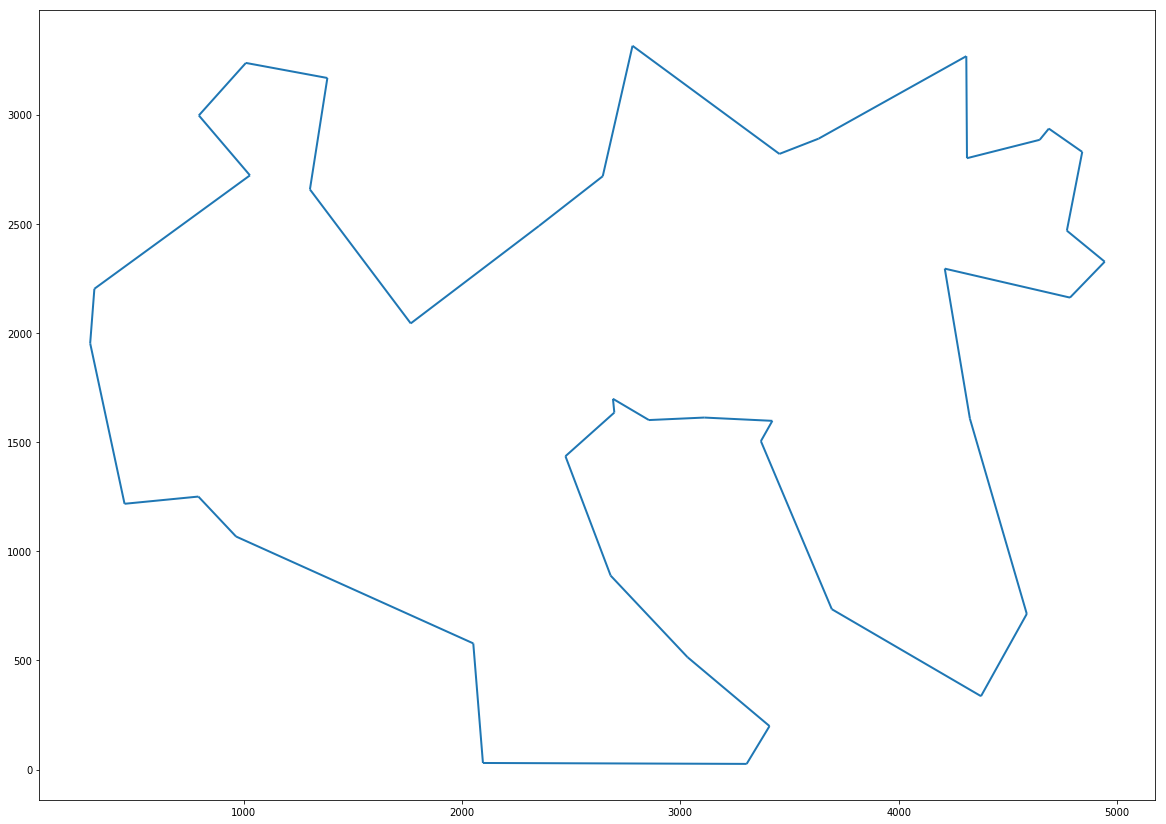

In [405]:
distances = plot_path(population[-1].path, cities[["X", "Y"]].values)

In [29]:
class Individual():
    def __init__(self, path):
        self.path = path
        self.fitness = Tour(path).score()
        self.ranking = 0


In [33]:
def get_rank(pop_size, selection_pressure, position):
    rank = 2 - selection_pressure + 2*(selection_pressure-1)*((position-1)/(pop_size-1))
    return rank

In [27]:
def generate_ind():
    indiv = list(range(1,42))
    indiv = np.random.permutation(indiv)
    indiv = np.insert(indiv, 0, 0)
    indiv = np.insert(indiv, len(indiv), 0)
    indiv = list(indiv)
    
    assert indiv[0]==indiv[-1]==0
    assert len(set(indiv))==len(indiv)-1
    
    return Individual(indiv)

In [34]:
def mutate(indiv):
#    i, ii, j, jj, k, kk, l, ll = 3, 4, 9, 10, 28, 29, 35, 36
    
    i = np.random.randint(1, int(0.25*len(indiv.path)))
    ii = i+1
    
    j = np.random.randint(int(0.25*len(indiv.path))+1, int(0.50*len(indiv.path)))
    jj = j+1
    
    k = np.random.randint(int(0.50*len(indiv.path))+1, int(0.75*len(indiv.path)))
    kk = k+1
    
    l = np.random.randint(int(0.75*len(indiv.path))+1, len(indiv.path)-2)
    ll = l+1
    
    new_genome = indiv.path[0:i+1]

    new_genome.append(indiv.path[kk])
    new_genome.extend(indiv.path[kk+1:l+1])
    new_genome.append(indiv.path[jj])
    new_genome.extend(indiv.path[jj+1:k+1])
    new_genome.append(indiv.path[ii])
    new_genome.extend(indiv.path[ii+1:j+1])
    new_genome.append(indiv.path[ll])
    new_genome.extend(indiv.path[ll+1:])


    assert len(new_genome)==len(indiv.path)
    assert new_genome[0]==new_genome[-1]==0
    assert len(set(new_genome))==len(new_genome)-1
    
    return Individual(new_genome)

In [35]:
def crossover(p1, p2):
    
    parent1, parent2 = p1.path, p2.path
    rnd_city = np.random.randint(low=1, high=42)
    offspring = [rnd_city]
    rnd_city_in_parent1 = parent1.index(rnd_city)
    rnd_city_in_parent2 = parent2.index(rnd_city)
    city_included = [rnd_city]
    STOP = False
    idx1 = rnd_city_in_parent1 + 1
    idx2 = rnd_city_in_parent2 - 1
    while not STOP:
        if idx1 < len(parent1)-1: ## -1 for the 0 
            if parent1[idx1] in city_included:
                STOP = True
                break
            offspring.append(parent1[idx1])
            city_included.append(parent1[idx1])
            idx1+=1
        else:
            break

        if idx2 > 0: ## > strict for the 0
            if parent2[idx2] in city_included:
                STOP = True
                break
            offspring.insert( 0,parent2[idx2])
            city_included.append(parent2[idx2])
            idx2-=1
    for i in range(1, len(parent2)-1): ##-1 for the zero
        if parent2[i] not in city_included:
            offspring.append(parent2[i])
    offspring.append(0)
    offspring.insert(0, 0)
    
    assert len(offspring)==len(p1.path)
    assert offspring[0]==offspring[-1]==0
    assert len(set(offspring))==len(offspring)-1
    
    return Individual(offspring)